<a href="https://colab.research.google.com/github/putuwinda/Assignment5_DTI/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression
Multiple Linear Regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.


---


In this notebook we will create the multiple linear regression betweens the data given.


---


**The multiple linear regression are betweens dependent variable ('pie_sales') and independent variable ('week','advertising', and 'price')**



---
Ni Putu Winda Ardiyanti-DS0123


## Import Libraries

in this phase we import the libraries needed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Preparation

After all the libraries sets up, we begin to do the data preparation (read the data, missing values,outliers etc) in this phase.

In [ ]:
#import the dataset from github to the dataframe(df)
#the dataset in form of csv, to make it comfortable to be read, we use ';' to as the seperator.
#
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")

In [ ]:
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


The dataset has four features and every features has 15 entries(value of data), the features are in numerical form(integer and float)

list the features:


*  week        : the information of week that the pie are selling (week 1 until week 15)
*  pie_sales   : the information of the pie that sold on the current week
*  price       : the price of each pie
*  advertising : advertising costs

**Independent Variables**
- price, advertising, week

**Dependent Variables**
- pie_sales (units per week)



In [ ]:
#shape of the data
df.shape

(15, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         15 non-null     int64  
 1   pie_sales    15 non-null     int64  
 2   price        15 non-null     float64
 3   advertising  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


In [ ]:
#dataset description
df.describe()

,week,pie_sales,price,advertising
count,15.000000,15.000000,15.000000,15.00000
mean,8.000000,399.333333,6.613333,3.48000
std,4.472136,63.523524,1.171609,0.48873
min,1.000000,300.000000,4.500000,2.70000
25%,4.500000,350.000000,5.700000,3.10000
50%,8.000000,430.000000,7.000000,3.50000
75%,11.500000,450.000000,7.500000,3.85000
max,15.000000,490.000000,8.000000,4.50000


In [ ]:
#define the missing variables
df.isnull().sum()

week           0
pie_sales      0
price          0
advertising    0
dtype: int64

## Exploratory Data Analysis (EDA)

in this phase we will do the data exploration (correlation, visualization, etc)

**Correlation betweens data**

-  **pie_sales** has a huge positive correlation with **advertising** , it is **0.56**
- **pie_sales** and **week** has a negative correlation, it is **-0.068**
-  **pie_sales** and **price** has a negative correlation, it is **-0.44**


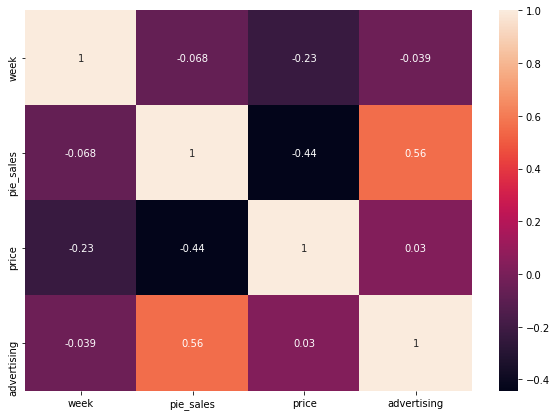

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Plotting the features 'advertising' and 'pie_sales'**



<Figure size 432x288 with 0 Axes>

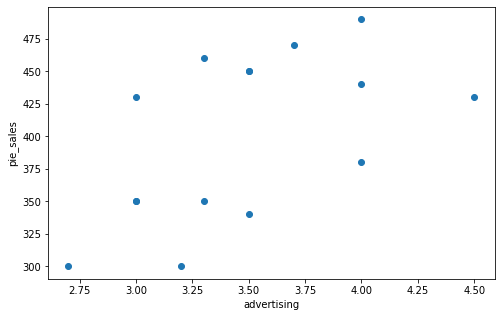

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['advertising'], df['pie_sales'], 'o')
plt.xlabel('advertising')
plt.ylabel('pie_sales')
plt.show()

**Plotting the features 'week' and 'pie_sales'**

<Figure size 432x288 with 0 Axes>

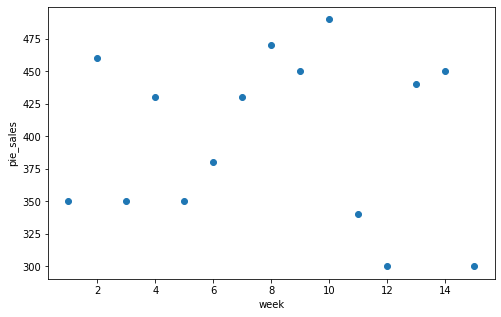

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['week'], df['pie_sales'], 'o')
plt.xlabel('week')
plt.ylabel('pie_sales')
plt.show()

**Plotting the features 'price' and 'pie_sales'**

<Figure size 432x288 with 0 Axes>

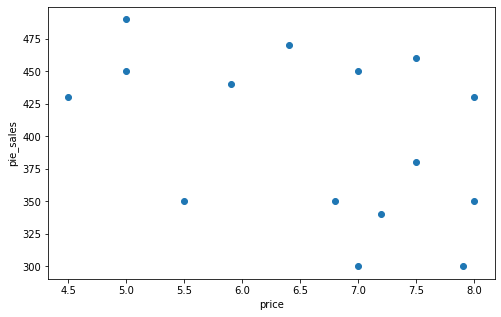

In [ ]:
fig = plt.figure()
plt.figure(figsize=(8,5))
plt.plot(df['price'], df['pie_sales'], 'o')
plt.xlabel('price')
plt.ylabel('pie_sales')
plt.show()

## Modeling

**Data Splitting**

In [ ]:
#split the data into X(independent variables) and Y(dependent variables)
X = df[['week','price','advertising']]
Y = df[['pie_sales']]

In [ ]:
X.head()

,week,price,advertising
0,1,5.5,3.3
1,2,7.5,3.3
2,3,8.0,3.0
3,4,8.0,4.5
4,5,6.8,3.0


In [ ]:
Y.head()

,pie_sales
0,350
1,460
2,350
3,430
4,350


**Regression using Sklearn**

In [ ]:
#using the library model sklearn linear regression (LinearRegression())
regression = linear_model.LinearRegression()
regression.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept: \n', regression.intercept_)
print('Coefficients: \n', regression.coef_)

Intercept: 
 [339.79655586]
Coefficients: 
 [[ -2.25541919 -26.92659652  73.46399119]]


In [ ]:
# prediction with sklearn
new_week = 16
new_price = 8.5
new_advertising = 3.7
print ('Predicted  pie_sales: \n', regression.predict([[new_week, new_price, new_advertising]]))

Predicted  pie_sales: 
 [[346.65054578]]


In [ ]:
# prediction with sklearn
new_week = 1
new_price = 5.5
new_advertising = 3.3
print ('Predicted  pie_sales: \n', regression.predict([[new_week, new_price, new_advertising]]))

Predicted  pie_sales: 
 [[431.8760267]]


**Regression using Statsmodels**

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     4.398
Date:                Wed, 21 Oct 2020   Prob (F-statistic):             0.0290
Time:                        18:24:03   Log-Likelihood:                -77.126
No. Observations:                  15   AIC:                             162.3
Df Residuals:                      11   BIC:                             165.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         339.7966    124.282      2.734      